# Price Predictor Parameter Optimisation

In [1]:
import src.utils.file_management as filemgmt
import src.pipeline.preprocessing as prep
import src.pipeline.predictors as predictors
from src.pipeline.predictors import LSTMPredictor

import pandas as pd
import numpy as np
from pathlib import Path
from typing import Literal, Union

from tqdm import tqdm
from alpha_vantage.timeseries import TimeSeries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt

In [2]:
ROOT = Path().resolve().parent

DATA = ROOT / "data"
DAILY_PRICES = DATA / "daily_price_downloads"
MINUTELY_PRICES = DATA / "minutely_price_downloads"
INTERPOLATED_PRICES = DATA / "interpolated_prices"

SAVED_MODELS = DATA / "saved_models"

## Parametrisation Short-Term - a2
Predict **4 hours** based on **15-minutely price data** of the **last 8 hours**.

In [8]:
a2_results = predictors.predictor_parametrisation_loop(evaluate_hit_rate=True,
                                                       sort_metric='Val HR',
                                                       n_train_epochs=200,
                                                       early_stopping_patience=20,
                                                       sampling_rate_minutes=15,  # 15 minutes
                                                       price_csv_path=filemgmt.most_recent_file(INTERPOLATED_PRICES, '.csv', '15min'),
                                                       daily_prediction_hour=16,
                                                       predict_before_daily_prediction_hour=False,
                                                       rolling_window_size=32,
                                                       forecast_horizon=16,
                                                       batch_size=64,
                                                       validation_split=0.1,
                                                       model_save_directory=SAVED_MODELS / "predictor_a2",
                                                       # parameters to optimise for:
                                                       hidden_lstm_layer_size_set=[128, 256],  # 64 (was mostly worse)
                                                       n_lstm_layers_set=[3, 4],  # 2 (was mostly worse)
                                                       forecast_step_loss_weight_range_set=[(1, .7), (.85, .85),
                                                                                            (.7, 1)],
                                                       use_pre_lstm_fc_layer_set=[False],  # True (maybe simplicity is key?)
                                                       use_final_hidden_state_set=[True],  # False  (settings seems to have negligible impact)
                                                       dropout_set=[.4],  # .3  (.4 seems to generalise better, as expected)
                                                       )
a2_results

Train loss: 0.038591534859733656 | Val Loss: 2.4626315534114838  | Patience 19/20 | LRate: 6.25e-05 | Progress:  19%|█▉        | 38/200 [02:43<11:37,  4.30s/it]


Early stopping triggered at validation loss of 2.1718326210975647


100%|██████████| 275/275 [00:02<00:00, 97.51it/s]
Train loss: 0.047490859898971394 | Val Loss: 2.4323862493038177  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▏        | 24/200 [01:47<13:10,  4.49s/it]


Early stopping triggered at validation loss of 2.7633748054504395


100%|██████████| 275/275 [00:02<00:00, 102.95it/s]
Train loss: 0.04521715268492699 | Val Loss: 2.3603419959545135  | Patience 19/20 | LRate: 0.000125 | Progress:  11%|█         | 22/200 [01:39<13:21,  4.51s/it]


Early stopping triggered at validation loss of 2.531826436519623


100%|██████████| 275/275 [00:02<00:00, 97.89it/s]
Train loss: 0.04311996062460821 | Val Loss: 2.308650553226471  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▎        | 25/200 [02:32<17:45,  6.09s/it] 


Early stopping triggered at validation loss of 2.5630407631397247


100%|██████████| 275/275 [00:03<00:00, 78.09it/s]
Train loss: 0.04265175528416876 | Val Loss: 2.2614286839962006  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▎        | 25/200 [02:34<18:01,  6.18s/it]


Early stopping triggered at validation loss of 2.362072706222534


100%|██████████| 275/275 [00:03<00:00, 80.24it/s]
Train loss: 0.04233079185360111 | Val Loss: 2.149389535188675  | Patience 19/20 | LRate: 0.000125 | Progress:  13%|█▎        | 26/200 [02:42<18:09,  6.26s/it] 


Early stopping triggered at validation loss of 2.2570862770080566


100%|██████████| 275/275 [00:03<00:00, 80.20it/s]
Train loss: 0.041194791439920664 | Val Loss: 2.2919795513153076  | Patience 19/20 | LRate: 0.000125 | Progress:  10%|█         | 21/200 [04:08<35:21, 11.85s/it]


Early stopping triggered at validation loss of 2.733959883451462


100%|██████████| 275/275 [00:03<00:00, 72.24it/s]
Train loss: 0.043918579060118645 | Val Loss: 2.2990501523017883  | Patience 19/20 | LRate: 0.000125 | Progress:  10%|█         | 20/200 [03:57<35:35, 11.86s/it]


Early stopping triggered at validation loss of 2.162608250975609


100%|██████████| 275/275 [00:03<00:00, 72.51it/s]
Train loss: 0.036813960286963265 | Val Loss: 1.6997721046209335  | Patience 19/20 | LRate: 3.90625e-06 | Progress:  44%|████▎     | 87/200 [16:47<21:48, 11.58s/it]


Early stopping triggered at validation loss of 1.738769382238388


100%|██████████| 275/275 [00:03<00:00, 72.01it/s]
Train loss: 0.03997202870959882 | Val Loss: 2.719214677810669  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▏        | 23/200 [06:03<46:37, 15.80s/it] 


Early stopping triggered at validation loss of 2.3316901326179504


100%|██████████| 275/275 [00:05<00:00, 53.92it/s]
Train loss: 0.03491487151768524 | Val Loss: 1.551470622420311  | Patience 19/20 | LRate: 4.8828125e-07 | Progress:  51%|█████     | 102/200 [26:58<25:55, 15.87s/it]


Early stopping triggered at validation loss of 1.6844927966594696


100%|██████████| 275/275 [00:05<00:00, 52.79it/s]
Train loss: 0.04496143452706747 | Val Loss: 2.4055043160915375  | Patience 19/20 | LRate: 0.000125 | Progress:  10%|█         | 20/200 [05:31<49:39, 16.55s/it]


Early stopping triggered at validation loss of 2.465428739786148


100%|██████████| 275/275 [00:05<00:00, 52.37it/s]


,Hidden Layer Size,N. LSTM Layers,Loss Weight Range,Pre-LSTM FC Layer,Final Hidden State,Dropout,Train Loss,Val Loss,Train HR,Val HR
10,256,4,"(0.85, 0.85)",False,True,0.4,0.034957,1.684493,0.47812,0.461818
8,256,3,"(0.7, 1)",False,True,0.4,0.036902,1.738769,0.469611,0.454545
2,128,3,"(0.7, 1)",False,True,0.4,0.043851,2.531826,0.48906,0.447273
6,256,3,"(1, 0.7)",False,True,0.4,0.041657,2.73396,0.497569,0.443636
3,128,4,"(1, 0.7)",False,True,0.4,0.043735,2.563041,0.476904,0.421818
7,256,3,"(0.85, 0.85)",False,True,0.4,0.041528,2.162608,0.486629,0.421818
0,128,3,"(1, 0.7)",False,True,0.4,0.038111,2.171833,0.45624,0.407273
5,128,4,"(0.7, 1)",False,True,0.4,0.041998,2.257086,0.427877,0.407273
1,128,3,"(0.85, 0.85)",False,True,0.4,0.045887,2.763375,0.468395,0.403636
4,128,4,"(0.85, 0.85)",False,True,0.4,0.040517,2.362073,0.476094,0.403636


## Parametrisation Mid-Term - b1
Predict **1 day** based on **hourly price data** of the **last week**.

In [4]:
b1_results = predictors.predictor_parametrisation_loop(evaluate_hit_rate=True,
                                                       sort_metric='Val HR',
                                                       n_train_epochs=200,
                                                       early_stopping_patience=20,
                                                       sampling_rate_minutes=60,  # hourly prices
                                                       price_csv_path=filemgmt.most_recent_file(INTERPOLATED_PRICES, '.csv', '60min'),
                                                       daily_prediction_hour=20,
                                                       predict_before_daily_prediction_hour=True,
                                                       rolling_window_size=68,
                                                       forecast_horizon=14,
                                                       batch_size=64,
                                                       validation_split=0.1,
                                                       model_save_directory=SAVED_MODELS / "predictor_b1",
                                                       # parameters to optimise for:
                                                       hidden_lstm_layer_size_set=[128, 256],  # 64 (was mostly worse)
                                                       n_lstm_layers_set=[3, 4],  # 2 (was mostly worse)
                                                       forecast_step_loss_weight_range_set=[(1, .7), (.85, .85),
                                                                                            (.7, 1)],
                                                       use_pre_lstm_fc_layer_set=[False],  # True (maybe simplicity is key?)
                                                       use_final_hidden_state_set=[True],  # False  (settings seems to have negligible impact)
                                                       dropout_set=[.4],  # .3  (.4 seems to generalise better, as expected)
                                                       )
b1_results

Train loss: 0.10543301748111844 | Val Loss: 2.1782477498054504  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▎        | 25/200 [02:23<16:45,  5.74s/it]


Early stopping triggered at validation loss of 2.1479981541633606


100%|██████████| 274/274 [00:02<00:00, 116.52it/s]
Train loss: 0.10312092851381749 | Val Loss: 1.7639930248260498  | Patience 19/20 | LRate: 3.90625e-06 | Progress:  36%|███▌      | 72/200 [06:49<12:07,  5.68s/it]


Early stopping triggered at validation loss of 2.0777192413806915


100%|██████████| 274/274 [00:02<00:00, 115.22it/s]
Train loss: 0.10946871398482472 | Val Loss: 2.2734962701797485  | Patience 19/20 | LRate: 1.953125e-06 | Progress:  36%|███▌      | 71/200 [06:41<12:09,  5.66s/it]


Early stopping triggered at validation loss of 2.337818756699562


100%|██████████| 274/274 [00:02<00:00, 113.95it/s]
Train loss: 0.10974332701880485 | Val Loss: 2.162226140499115  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▏        | 24/200 [03:49<28:01,  9.55s/it]


Early stopping triggered at validation loss of 2.4202506244182587


100%|██████████| 274/274 [00:03<00:00, 70.25it/s]
Train loss: 0.0998729313723743 | Val Loss: 1.889426052570343  | Patience 19/20 | LRate: 7.8125e-06 | Progress:  35%|███▌      | 70/200 [11:57<22:12, 10.25s/it]  


Early stopping triggered at validation loss of 1.7904465049505234


100%|██████████| 274/274 [00:04<00:00, 61.00it/s]
Train loss: 0.10835820145439357 | Val Loss: 2.057125210762024  | Patience 19/20 | LRate: 7.8125e-06 | Progress:  33%|███▎      | 66/200 [10:20<21:00,  9.41s/it] 


Early stopping triggered at validation loss of 2.1043761074543


100%|██████████| 274/274 [00:03<00:00, 70.80it/s]
Train loss: 0.09312028042040765 | Val Loss: 2.260948419570923  | Patience 19/20 | LRate: 1.5625e-05 | Progress:  28%|██▊       | 57/200 [18:09<45:33, 19.12s/it]


Early stopping triggered at validation loss of 2.331695467233658


100%|██████████| 274/274 [00:03<00:00, 87.52it/s]
Train loss: 0.1056306849932298 | Val Loss: 1.9904246628284454  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▎        | 25/200 [06:46<47:28, 16.28s/it]


Early stopping triggered at validation loss of 1.9110333621501923


100%|██████████| 274/274 [00:05<00:00, 51.59it/s]
Train loss: 0.10263369721360505 | Val Loss: 2.07333242893219  | Patience 19/20 | LRate: 6.25e-05 | Progress:  24%|██▍       | 48/200 [15:09<48:01, 18.95s/it]  


Early stopping triggered at validation loss of 2.4295504689216614


100%|██████████| 274/274 [00:03<00:00, 85.48it/s]
Train loss: 0.09359292197041214 | Val Loss: 2.0738063752651215  | Patience 19/20 | LRate: 7.8125e-06 | Progress:  30%|███       | 61/200 [21:08<48:10, 20.80s/it]


Early stopping triggered at validation loss of 1.7711784839630127


100%|██████████| 274/274 [00:05<00:00, 53.53it/s]
Train loss: 0.10909297317266464 | Val Loss: 1.923585593700409  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▏        | 23/200 [08:13<1:03:17, 21.45s/it]


Early stopping triggered at validation loss of 2.12076997756958


100%|██████████| 274/274 [00:05<00:00, 54.32it/s]
Train loss: 0.11428390408400446 | Val Loss: 2.1895630061626434  | Patience 19/20 | LRate: 0.000125 | Progress:  10%|█         | 21/200 [07:32<1:04:13, 21.53s/it]


Early stopping triggered at validation loss of 2.183376431465149


100%|██████████| 274/274 [00:04<00:00, 64.57it/s]


,Hidden Layer Size,N. LSTM Layers,Loss Weight Range,Pre-LSTM FC Layer,Final Hidden State,Dropout,Train Loss,Val Loss,Train HR,Val HR
7,256,3,"(0.85, 0.85)",False,True,0.4,0.106412,1.911033,0.486004,0.532847
1,128,3,"(0.85, 0.85)",False,True,0.4,0.100857,2.077719,0.474239,0.529197
4,128,4,"(0.85, 0.85)",False,True,0.4,0.099665,1.790447,0.46856,0.529197
0,128,3,"(1, 0.7)",False,True,0.4,0.10476,2.147998,0.489249,0.521898
9,256,4,"(1, 0.7)",False,True,0.4,0.092239,1.771178,0.480325,0.521898
2,128,3,"(0.7, 1)",False,True,0.4,0.113377,2.337819,0.476268,0.518248
3,128,4,"(1, 0.7)",False,True,0.4,0.108607,2.420251,0.490467,0.518248
5,128,4,"(0.7, 1)",False,True,0.4,0.106644,2.104376,0.48357,0.518248
6,256,3,"(1, 0.7)",False,True,0.4,0.09268,2.331695,0.467748,0.510949
10,256,4,"(0.85, 0.85)",False,True,0.4,0.108009,2.12077,0.494118,0.510949


## Parametrisation Mid-Term - b3
Predict **1 week** based on **daily price data** of the **last 2 months**. 

In [7]:
b3_results = predictors.predictor_parametrisation_loop(evaluate_hit_rate=True,
                                                       sort_metric='Val HR',
                                                       n_train_epochs=200,
                                                       early_stopping_patience=20,
                                                       sampling_rate_minutes=60 * 14,  # one day from 8am to 22pm
                                                       price_csv_path=filemgmt.most_recent_file(INTERPOLATED_PRICES, '.csv', '1d'),
                                                       daily_prediction_hour=20,
                                                       predict_before_daily_prediction_hour=True,  # irrelevant
                                                       rolling_window_size=40,  # i.e. 2 months á 20 days
                                                       forecast_horizon=5,  # i.e. 1 week á 5 days
                                                       batch_size=64,
                                                       validation_split=0.1,
                                                       model_save_directory=SAVED_MODELS / "predictor_b3",
                                                       # parameters to optimise for:
                                                       hidden_lstm_layer_size_set=[128, 256],  # 64 (was mostly worse)
                                                       n_lstm_layers_set=[3, 4],  # 2 (was mostly worse)
                                                       forecast_step_loss_weight_range_set=[(1, .7), (.85, .85),
                                                                                            (.7, 1)],
                                                       use_pre_lstm_fc_layer_set=[False],  # True (maybe simplicity is key?)
                                                       use_final_hidden_state_set=[True],  # False  (settings seems to have negligible impact)
                                                       dropout_set=[.4],  # .3  (.4 seems to generalise better, as expected)
                                                       )
b3_results

Train loss: 0.3633599733002484 | Val Loss: 1.9217457175254822  | Patience 19/20 | LRate: 6.25e-05 | Progress:  16%|█▌        | 31/200 [01:30<08:15,  2.93s/it] 


Early stopping triggered at validation loss of 1.9578219056129456


100%|██████████| 270/270 [00:01<00:00, 259.59it/s]
Train loss: 0.3712230180390179 | Val Loss: 1.92317496240139  | Patience 19/20 | LRate: 0.000125 | Progress:  16%|█▌        | 32/200 [01:35<08:22,  2.99s/it]  


Early stopping triggered at validation loss of 2.31107160449028


100%|██████████| 270/270 [00:01<00:00, 264.32it/s]
Train loss: 0.40134902857244015 | Val Loss: 1.7310772836208344  | Patience 19/20 | LRate: 0.000125 | Progress:  14%|█▎        | 27/200 [01:21<08:39,  3.00s/it]


Early stopping triggered at validation loss of 1.972681313753128


100%|██████████| 270/270 [00:01<00:00, 268.12it/s]
Train loss: 0.3458094601519406 | Val Loss: 1.5599791407585144  | Patience 19/20 | LRate: 3.125e-05 | Progress:  20%|█▉        | 39/200 [02:44<11:20,  4.23s/it]


Early stopping triggered at validation loss of 1.6891347616910934


100%|██████████| 270/270 [00:01<00:00, 211.72it/s]
Train loss: 0.38508819369599223 | Val Loss: 2.0278067588806152  | Patience 19/20 | LRate: 0.000125 | Progress:  14%|█▎        | 27/200 [01:57<12:31,  4.35s/it]


Early stopping triggered at validation loss of 2.1556748151779175


100%|██████████| 270/270 [00:01<00:00, 205.92it/s]
Train loss: 0.4041412160731852 | Val Loss: 2.00884947180748  | Patience 19/20 | LRate: 0.000125 | Progress:  14%|█▍        | 28/200 [01:59<12:15,  4.27s/it]  


Early stopping triggered at validation loss of 1.6586290672421455


100%|██████████| 270/270 [00:01<00:00, 205.93it/s]
Train loss: 0.3586260718293488 | Val Loss: 1.8847213983535767  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▏        | 23/200 [03:06<23:54,  8.10s/it]


Early stopping triggered at validation loss of 2.017342269420624


100%|██████████| 270/270 [00:01<00:00, 147.86it/s]
Train loss: 0.370660703163594 | Val Loss: 2.334721326828003  | Patience 19/20 | LRate: 0.000125 | Progress:  11%|█         | 22/200 [02:56<23:47,  8.02s/it]  


Early stopping triggered at validation loss of 2.2051035463809967


100%|██████████| 270/270 [00:01<00:00, 172.42it/s]
Train loss: 0.3538063205778599 | Val Loss: 2.6640416979789734  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▎        | 25/200 [03:16<22:54,  7.85s/it]


Early stopping triggered at validation loss of 2.615083247423172


100%|██████████| 270/270 [00:01<00:00, 178.63it/s]
Train loss: 0.34425140684470534 | Val Loss: 2.4400920271873474  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▏        | 23/200 [04:10<32:05, 10.88s/it]


Early stopping triggered at validation loss of 1.9318217933177948


100%|██████████| 270/270 [00:02<00:00, 133.33it/s]
Train loss: 0.35330283967778087 | Val Loss: 2.2607725858688354  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▎        | 25/200 [04:28<31:22, 10.76s/it]


Early stopping triggered at validation loss of 2.0479410886764526


100%|██████████| 270/270 [00:02<00:00, 133.42it/s]
Train loss: 0.3600581893697381 | Val Loss: 2.123261570930481  | Patience 19/20 | LRate: 0.000125 | Progress:  13%|█▎        | 26/200 [04:41<31:25, 10.84s/it] 


Early stopping triggered at validation loss of 2.2467836141586304


100%|██████████| 270/270 [00:02<00:00, 134.18it/s]


,Hidden Layer Size,N. LSTM Layers,Loss Weight Range,Pre-LSTM FC Layer,Final Hidden State,Dropout,Train Loss,Val Loss,Train HR,Val HR
0,128,3,"(1, 0.7)",False,True,0.4,0.360554,1.957822,0.547325,0.52963
9,256,4,"(1, 0.7)",False,True,0.4,0.345409,1.931822,0.56749,0.522222
6,256,3,"(1, 0.7)",False,True,0.4,0.350409,2.017342,0.541975,0.518519
8,256,3,"(0.7, 1)",False,True,0.4,0.353528,2.615083,0.602469,0.514815
1,128,3,"(0.85, 0.85)",False,True,0.4,0.361293,2.311072,0.571605,0.511111
2,128,3,"(0.7, 1)",False,True,0.4,0.399043,1.972681,0.580658,0.511111
3,128,4,"(1, 0.7)",False,True,0.4,0.348699,1.689135,0.559671,0.503704
10,256,4,"(0.85, 0.85)",False,True,0.4,0.355529,2.047941,0.545679,0.503704
4,128,4,"(0.85, 0.85)",False,True,0.4,0.383634,2.155675,0.563374,0.5
11,256,4,"(0.7, 1)",False,True,0.4,0.350428,2.246784,0.603704,0.5


## Parametrisation Long-Term - c1
Predict **3 weeks** based on **weekly price data** of the **last 6 months**.

In [6]:
c1_results = predictors.predictor_parametrisation_loop(evaluate_hit_rate=True,
                                                       sort_metric='Val HR',
                                                       n_train_epochs=200,
                                                       early_stopping_patience=20,
                                                       sampling_rate_minutes=7 * 14 * 60,  # 1 week = 7 days each from 8am to 22pm
                                                       price_csv_path=filemgmt.most_recent_file(INTERPOLATED_PRICES, '.csv', '7d'),
                                                       daily_prediction_hour=20,
                                                       predict_before_daily_prediction_hour=True,  # irrelevant
                                                       rolling_window_size=24,  # i.e. 6 months á 4 weeks
                                                       forecast_horizon=3,  # i.e. 3 weeks
                                                       batch_size=64,
                                                       validation_split=0.1,
                                                       model_save_directory=SAVED_MODELS / "predictor_c1",
                                                       # parameters to optimise for:
                                                       hidden_lstm_layer_size_set=[128, 256],  # 64 (was mostly worse)
                                                       n_lstm_layers_set=[3, 4],  # 2 (was mostly worse)
                                                       forecast_step_loss_weight_range_set=[(1, .7), (.85, .85),
                                                                                            (.7, 1)],
                                                       use_pre_lstm_fc_layer_set=[False],  # True (maybe simplicity is key?)
                                                       use_final_hidden_state_set=[True],  # False  (settings seems to have negligible impact)
                                                       dropout_set=[.4],  # .3  (.4 seems to generalise better, as expected)
                                                       )
c1_results

Train loss: 0.24762212112545967 | Val Loss: 0.40837720036506653  | Patience 19/20 | LRate: 0.000125 | Progress:  15%|█▌        | 30/200 [00:10<00:58,  2.90it/s]


Early stopping triggered at validation loss of 0.39249199628829956


100%|██████████| 53/53 [00:00<00:00, 432.91it/s]
Train loss: 0.25973297841846943 | Val Loss: 0.4356614649295807  | Patience 19/20 | LRate: 0.000125 | Progress:  15%|█▌        | 30/200 [00:11<01:06,  2.58it/s]


Early stopping triggered at validation loss of 0.4400423765182495


100%|██████████| 53/53 [00:00<00:00, 434.71it/s]
Train loss: 0.2586831822991371 | Val Loss: 0.49669259786605835  | Patience 19/20 | LRate: 0.000125 | Progress:  18%|█▊        | 36/200 [00:13<01:01,  2.69it/s]


Early stopping triggered at validation loss of 0.5106910467147827


100%|██████████| 53/53 [00:00<00:00, 370.80it/s]
Train loss: 0.23619787767529488 | Val Loss: 0.4288496971130371  | Patience 19/20 | LRate: 0.000125 | Progress:  18%|█▊        | 35/200 [00:19<01:31,  1.81it/s]


Early stopping triggered at validation loss of 0.4492229223251343


100%|██████████| 53/53 [00:00<00:00, 312.74it/s]
Train loss: 0.2544698268175125 | Val Loss: 0.47760796546936035  | Patience 19/20 | LRate: 0.000125 | Progress:  14%|█▍        | 28/200 [00:15<01:33,  1.83it/s]


Early stopping triggered at validation loss of 0.474360853433609


100%|██████████| 53/53 [00:00<00:00, 314.12it/s]
Train loss: 0.2985236272215843 | Val Loss: 0.42853492498397827  | Patience 19/20 | LRate: 0.000125 | Progress:  13%|█▎        | 26/200 [00:13<01:29,  1.94it/s]


Early stopping triggered at validation loss of 0.4320639967918396


100%|██████████| 53/53 [00:00<00:00, 309.07it/s]
Train loss: 0.22528578899800777 | Val Loss: 0.5138872861862183  | Patience 19/20 | LRate: 0.000125 | Progress:  16%|█▌        | 31/200 [00:28<02:35,  1.08it/s]


Early stopping triggered at validation loss of 0.5099337697029114


100%|██████████| 53/53 [00:00<00:00, 245.28it/s]
Train loss: 0.2517979387193918 | Val Loss: 0.4046744704246521  | Patience 19/20 | LRate: 0.000125 | Progress:  14%|█▍        | 28/200 [00:32<03:20,  1.16s/it] 


Early stopping triggered at validation loss of 0.41386863589286804


100%|██████████| 53/53 [00:00<00:00, 330.26it/s]
Train loss: 0.24053473956882954 | Val Loss: 0.5329576730728149  | Patience 19/20 | LRate: 0.000125 | Progress:  15%|█▌        | 30/200 [00:27<02:34,  1.10it/s]


Early stopping triggered at validation loss of 0.5361045002937317


100%|██████████| 53/53 [00:00<00:00, 341.00it/s]
Train loss: 0.2260698266327381 | Val Loss: 0.4243758022785187  | Patience 19/20 | LRate: 0.000125 | Progress:  13%|█▎        | 26/200 [00:32<03:38,  1.26s/it] 


Early stopping triggered at validation loss of 0.44463443756103516


100%|██████████| 53/53 [00:00<00:00, 201.77it/s]
Train loss: 0.2403896152973175 | Val Loss: 0.47081395983695984  | Patience 19/20 | LRate: 0.000125 | Progress:  12%|█▎        | 25/200 [00:32<03:48,  1.31s/it]


Early stopping triggered at validation loss of 0.47508177161216736


100%|██████████| 53/53 [00:00<00:00, 253.67it/s]
Train loss: 0.24536843784153461 | Val Loss: 0.545497477054596  | Patience 19/20 | LRate: 0.000125 | Progress:  14%|█▎        | 27/200 [00:32<03:28,  1.20s/it]


Early stopping triggered at validation loss of 0.5233075618743896


100%|██████████| 53/53 [00:00<00:00, 264.66it/s]


,Hidden Layer Size,N. LSTM Layers,Loss Weight Range,Pre-LSTM FC Layer,Final Hidden State,Dropout,Train Loss,Val Loss,Train HR,Val HR
5,128,4,"(0.7, 1)",False,True,0.4,0.296821,0.432064,0.557447,0.566038
0,128,3,"(1, 0.7)",False,True,0.4,0.248152,0.392492,0.548936,0.54717
3,128,4,"(1, 0.7)",False,True,0.4,0.252073,0.449223,0.580851,0.528302
1,128,3,"(0.85, 0.85)",False,True,0.4,0.249435,0.440042,0.570213,0.509434
2,128,3,"(0.7, 1)",False,True,0.4,0.257843,0.510691,0.6,0.509434
6,256,3,"(1, 0.7)",False,True,0.4,0.230221,0.509934,0.623404,0.509434
9,256,4,"(1, 0.7)",False,True,0.4,0.230707,0.444634,0.604255,0.509434
10,256,4,"(0.85, 0.85)",False,True,0.4,0.242256,0.475082,0.602128,0.509434
4,128,4,"(0.85, 0.85)",False,True,0.4,0.270373,0.474361,0.565957,0.490566
7,256,3,"(0.85, 0.85)",False,True,0.4,0.231334,0.413869,0.608511,0.490566


## Run

In [77]:
AV_API_KEY_FILE = ROOT / "private" / "Alpha Vantage API Key.txt"
with open(AV_API_KEY_FILE) as file: AV_API_KEY = file.read()

sampling_rate_minutes = 15
ticker = 'Dax'

In [78]:
ts = TimeSeries(key=AV_API_KEY, output_format='pandas')
recent_dax = ts.get_intraday(ticker, interval=f'{sampling_rate_minutes}min',
                             outputsize="compact" if 14 * 60 / sampling_rate_minutes < 100 else "full")
daily_dax = recent_dax[0][recent_dax[0].index.day_of_year == recent_dax[0].index.day_of_year.max()][
    '4. close']  # last day
recent_price_data = prep.time_interpolation_new_sampling_rate(daily_dax, '4. close', 'date',
                                                              f'{sampling_rate_minutes}min',
                                                              manual_operating_hours=(8, 22))
recent_price_data

,close
date,
2025-05-16 08:00:00,43.48750
2025-05-16 08:15:00,43.24000
2025-05-16 08:30:00,42.92000
2025-05-16 08:45:00,42.84000
2025-05-16 09:00:00,42.76000
2025-05-16 09:15:00,42.78000
2025-05-16 09:30:00,42.80000
2025-05-16 09:45:00,42.87500
2025-05-16 10:00:00,42.89790


Prices are expected to go DOWN!


(array([31.8091462 , 31.8301834 , 31.85673586, 31.88494352, 31.91238934,
        31.93949301, 31.96582016, 31.99007451, 32.01100482, 32.02798444,
        32.04102383, 32.05052384, 32.05705088, 32.06117972, 32.06342963,
        32.06423025]),
 DatetimeIndex(['2025-05-16 16:00:00', '2025-05-16 16:15:00',
                '2025-05-16 16:30:00', '2025-05-16 16:45:00',
                '2025-05-16 17:00:00', '2025-05-16 17:15:00',
                '2025-05-16 17:30:00', '2025-05-16 17:45:00',
                '2025-05-16 18:00:00', '2025-05-16 18:15:00',
                '2025-05-16 18:30:00', '2025-05-16 18:45:00',
                '2025-05-16 19:00:00', '2025-05-16 19:15:00',
                '2025-05-16 19:30:00', '2025-05-16 19:45:00'],
               dtype='datetime64[ns]', freq='15min'))

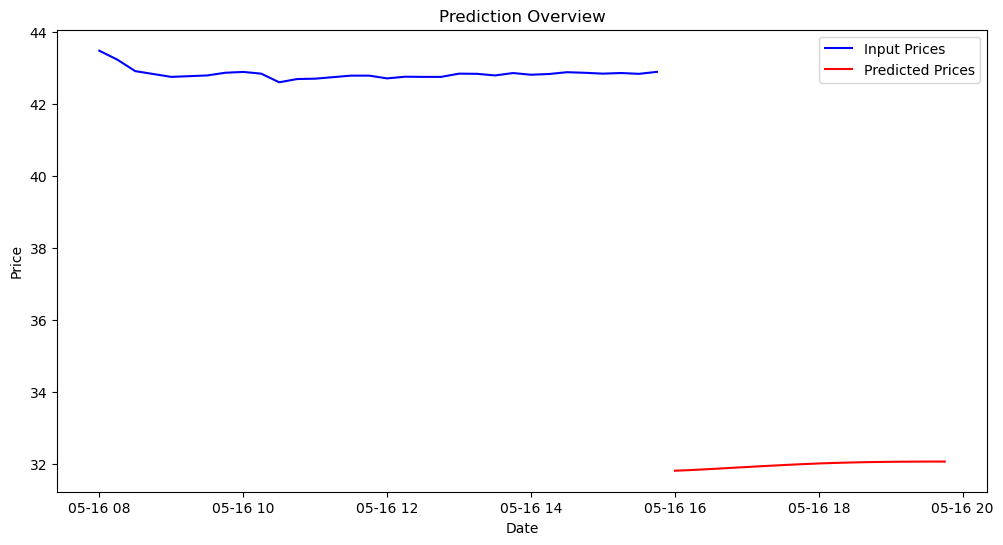

In [79]:
predictor_a2_1.predict(recent_price_data.iloc[:32])